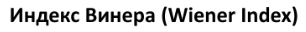
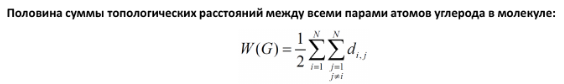

In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
import numpy as np

In [63]:
vyb = Chem.SDMolSupplier('sets/er_lit_3d.sd')

ms = [x for x in vyb if x is not None]
len(ms)

393

In [64]:
def clean_mark(mark, n) :
    
    for i in range(n) :
        mark[i] = 0

In [65]:
def wave(a, ii, n, mark) :
    
    f = 1
    
    mark_num = 1

    # поджог
    mark[ii] = mark_num

    # пока не подожжем все вершины
    while 1 :
        if f == 0 :
            break

        f = 0

        for i in range (n) :
            if mark[i] == mark_num :
                for j in range (n) :
                    if a[i][j] == 1 and mark[j] == 0 :
                        mark[j] = mark_num + 1
    
        for i in range (n) :
            if mark[i] == 0 :
                f = 1

        mark_num = mark_num + 1

In [66]:
def calc_Wiener_index(d, n) :
    
    sum = 0
    
    for i in range(n) :
        for j in range(n) :
            sum += d[i][j]
            
    return sum / 2

In [67]:
def init_distance_table_i(d, mark, i, n) :

    for j in range(n) :
        d[i][j] = mark[j] - 1

In [68]:
def init_distance_table(a, d, mark, n) :

    for i in range(n) :
        # очистить метки
        clean_mark(mark, n)

        # волна со стартовым атомом i
        wave(a, i, n, mark)

        # заполнить i-тую строку матрицы расстояний
        init_distance_table_i(d, mark, i, n)

In [71]:
Wiener_indices = np.zeros(len(ms), dtype = int, order = 'C')

for i in range(len(ms)) :
    n = ms[i].GetNumAtoms()
    a = Chem.rdmolops.GetAdjacencyMatrix(ms[i], useBO=False, emptyVal=0, force=False, prefix='')
     
    d = np.zeros((n, n), dtype = int, order = 'C')
    
    mark = np.zeros(n, dtype = int, order = 'C')
    
    init_distance_table(a, d, mark, n)
    
    print (d)
    
    Wiener_indices[i] = calc_Wiener_index(d, n)
    #print (Wiener_indices[i])

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  8  8  2]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  9  9  1]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  8  8  2]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  7  7  3]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  6  6  4]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  7  7  3]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  6  6  4]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  5]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  5]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  4  4  6]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  2  3  4  7]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  3  4  5  6]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  1  2  3  8]
 [ 5  6  5  4  3  4  3  2  2  1  2  3  1  0  1  2  2  2  3  3  7]
 [ 6  7  6  5  4  5  4  3  3  2  3  4  2  1  0  1  2  3  3  2  8]
 [ 7  8  7

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  8  2  8  9 10]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  9  1  9 10 11]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  8  2  8  9 10]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  7  3  7  8  9]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  6  4  6  7  8]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  7  3  7  8  9]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  6  4  6  7  8]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  5  6  7]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  5  6  7]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  4  6  4  5  6]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  2  3  7  4  5  6]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  3  4  6  5  6  7]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  1  2  8  3  4  5]
 [ 5  6  5  4  3  4  3  2  2  1  2  3  1  0  1  2  2  2  3  7  3

   2  1  0]]
[[ 0  1  2 ... 15 16 16]
 [ 1  0  1 ... 16 17 17]
 [ 2  1  0 ... 15 16 16]
 ...
 [15 16 15 ...  0  1  1]
 [16 17 16 ...  1  0  2]
 [16 17 16 ...  1  2  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  8  2  8  9]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  9  1  9 10]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  8  2  8  9]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  7  3  7  8]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  6  4  6  7]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  7  3  7  8]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  6  4  6  7]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  5  6]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  5  6]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  4  6  4  5]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  2  3  7  4  5]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  3  4  6  5  6]
 [ 

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  8  2  8  9  5  6
   7  8  7  6  9 10]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  9  1  9 10  6  7
   8  9  8  7 10 11]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  8  2  8  9  5  6
   7  8  7  6  9 10]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  7  3  7  8  4  5
   6  7  6  5  8  9]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  6  4  6  7  3  4
   5  6  5  4  7  8]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  7  3  7  8  4  5
   6  7  6  5  8  9]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  6  4  6  7  5  6
   7  8  7  6  9 10]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  5  6  4  5
   6  7  6  5  8  9]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  5  6  2  3
   4  5  4  3  6  7]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  4  6  4  5  3  4
   5  6  5  4  7  8]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3 

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  8  7  9 10 11]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  9  8 10 11 12]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  8  7  9 10 11]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  7  6  8  9 10]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  6  5  7  8  9]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  7  6  8  9 10]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  6  5  7  8  9]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  5  4  6  7  8]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  5  4  6  7  8]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  4  3  5  6  7]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  3  2  4  5  6]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  4  3  5  6  7]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  2  1  3  4  5]
 [ 5  6  5  4  3  4  3  2

 [11 12 11 10  9 10  9  8  8  7  6  7  5  6  6  5  4  5 13  3  6  2  1  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  8  7  9 10 11
  12 13 12 11]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  9  8 10 11 12
  13 14 13 12]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  8  7  9 10 11
  12 13 12 11]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  7  6  8  9 10
  11 12 11 10]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  6  5  7  8  9
  10 11 10  9]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  7  6  8  9 10
  11 12 11 10]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  6  5  7  8  9
  10 11 10  9]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  5  4  6  7  8
   9 10  9  8]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  5  4  6  7  8
   9 10  9  8]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  4  3  5  6  7
   8  9  8  7]
 [ 5  6  5  4  3  4  5  4  2  3  0

   2  1  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  8  7  9 10 11
  12 13 14 15 14 13]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  9  8 10 11 12
  13 14 15 16 15 14]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  8  7  9 10 11
  12 13 14 15 14 13]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  7  6  8  9 10
  11 12 13 14 13 12]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  6  5  7  8  9
  10 11 12 13 12 11]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  7  6  8  9 10
  11 12 13 14 13 12]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  6  5  7  8  9
  10 11 12 13 12 11]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  5  4  6  7  8
   9 10 11 12 11 10]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  5  4  6  7  8
   9 10 11 12 11 10]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  4  3  5  6  7
   8  9 10 11 10  9]
 [ 5  6  5  4  3  4  5  4  2  3  0  1

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  12 13 14 15 16]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11 12
  13 14 15 16 17]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  12 13 14 15 16]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
  11 12 13 14 15]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  9
  10 11 12 13 14]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
  11 12 13 14 15]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  9
  10 11 12 13 14]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  8
   9 10 11 12 13]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  8
   9 10 11 12 13]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  7
   8  9 10 11 12]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  5  6
   7  

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  12 13 14 15 16 15 14]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11 12
  13 14 15 16 17 16 15]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  12 13 14 15 16 15 14]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
  11 12 13 14 15 14 13]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  9
  10 11 12 13 14 13 12]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
  11 12 13 14 15 14 13]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  9
  10 11 12 13 14 13 12]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  8
   9 10 11 12 13 12 11]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  8
   9 10 11 12 13 12 11]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  7
   8  9 10 11 12 11 10]
 [ 5  6  5  4  3  4 

 [10 11 10  9  8  9  8  7  7  6  5  6  4  5  5  4  3  4 12  5  2  1  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  5]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  4  5  6]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  1  

 [10 11 10  9  8  9  8  7  7  6  5  6  4  5  5  4  3  4 12  5  2  1  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  12 13 14 13 12]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11 12
  13 14 15 14 13]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  12 13 14 13 12]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
  11 12 13 12 11]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  9
  10 11 12 11 10]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
  11 12 13 12 11]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  9
  10 11 12 11 10]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  8
   9 10 11 10  9]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  8
   9 10 11 10  9]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  7
   8  9 10  9  8]
 [ 5  6

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9  8]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10  9]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9  8]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  7]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  6]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  7]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  6]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  5]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  5]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  4]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  4]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  4  5  5]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  1  2  3  3]
 [ 5  6  5  4  3  4  3  2  2  1  2  3  1  0  1  2  2  3  7  2  3

 [ 6  7  6  5  4  5  6  5  3  4  3  2  4  5  6  6  5  6  8  5  6  1  7  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  10  9  8]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11 12
  11 10  9]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  10  9  8]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
   9  8  7]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  9
   8  7  6]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
   9  8  7]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  9
   8  7  6]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  8
   7  6  5]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  8
   7  6  5]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  7
   6  5  4]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3

 [ 8  9  8  7  6  7  6  5  5  4  4  5  3  3  2  1  2  3 10  4  3  6  7  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  5  6  8]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  6  7  9]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  5  6  8]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  4  5  7]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  3  4  6]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  4  5  7]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  5  6  6]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  4  5  5]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  2  3  5]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  3  4  4]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  2  3  4]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  1  2  5]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  

 [ 3  2  1  4  3  2  3  4  4  5  6  5  7  6  7  8  8  9  3  8  9 10  5  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  3  8  9 10]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  2  9 10 11]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  1  8  9 10]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  4  7  8  9]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  3  6  7  8]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  2  7  8  9]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  3  6  7  8]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  4  5  6  7]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  4  5  6  7]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  5  4  5  6]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  6  3  4  5]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  5  4  5  6]
 [ 6  7  6  5  4  5  4  

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  5  6  9
  10  3]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9  6  7 10
  11  2]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  5  6  9
  10  1]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  4  5  8
   9  4]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  3  4  7
   8  3]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  4  5  8
   9  2]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  5  6  7
   8  3]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  4  5  6
   7  4]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  2  3  6
   7  4]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  3  4  5
   6  5]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  2  3  4
   5  6]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  4  1  2  5
   6  5]
 [ 6

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10  5
   6  7]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11  6
   7  8]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10  5
   6  7]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9  4
   5  6]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  3
   4  5]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9  4
   5  6]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  5
   6  7]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  4
   5  6]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  2
   3  4]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  3
   4  5]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  5  2
   3  4]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  4  5  6  1
   2  3]
 [ 6

   0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10  5
   6  3]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11  6
   7  2]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10  5
   6  1]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9  4
   5  4]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  3
   4  3]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9  4
   5  2]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  5
   6  3]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  4
   5  4]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  2
   3  4]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  3
   4  5]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  5  2
   3  6]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  4  5  6  1
   2  

   0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9  5  6]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10  6  7]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9  5  6]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  4  5]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  3  4]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  4  5]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  5  6]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  4  5]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  2  3]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  3  4]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  2  3]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  4  5  1  2]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  1  2  3  3  4]
 [ 5  6  5  4  3  

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  3]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  2]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  1]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  4]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  3]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  2]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  3]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  4]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  4]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  5]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  6]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  5]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  1  7]
 [ 5  6  5  4  3  4  3  2  2  1  2  3  1  0  1  2  2  3  7  2  6]
 [ 6  7  6  5  4  5  4  3  3  2  3  4  2  1  0  1  2  3  8  3  7]
 [ 7  8  7

 [10 11 10  9  8  9  8  7  7  6  5  6  4  5  5  4  3  5 12  2  1  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  2  8  9  9]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  1  9 10 10]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  2  8  9  9]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  3  7  8  8]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  4  6  7  7]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  3  7  8  8]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  4  6  7  7]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  6  6]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  6  6]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  6  4  5  5]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  2  7  3  4  4]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  3  6  4  5  5]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  1  8  2  3  3]
 [ 5  6  5  4  3  4  3  2  2  1  

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  2  8  9 10 10]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  1  9 10 11 11]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  2  8  9 10 10]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  3  7  8  9  9]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  4  6  7  8  8]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  3  7  8  9  9]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  4  6  7  8  8]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  6  7  7]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  6  7  7]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  6  4  5  6  6]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  2  7  3  4  5  5]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  3  6  4  5  6  6]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  1  8  2  3  4  4]
 [ 5  6  5  4  3  4  3  2  2  1  2  3  1  0  1  2  2  2  7  3  4

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  12 13 12 11]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11 12
  13 14 13 12]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11
  12 13 12 11]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
  11 12 11 10]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  9
  10 11 10  9]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10
  11 12 11 10]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  9
  10 11 10  9]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  8
   9 10  9  8]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  8
   9 10  9  8]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  7
   8  9  8  7]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  5  6
   7  8  7  6]
 [ 4  5  4  3  2  3  

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11 12]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  9]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  9]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  8]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  8]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  7]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  5  6]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  4  5  6  7]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  1  2  3  4  5]
 [ 5  6  5  4  3  4  3  2

 [10 11 10  9  8  9  8  7  7  6  5  6  4  5  5  4  3  4 12  5  2  1  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  9 10 11 12]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  8  9 10 11]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  6  7  8  9]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  7  8  9 10]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  6  7  8  9]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  5  6  7  8]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  5  6  7  8]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  4  5  6  7]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  3  4  5  6]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  4  5  6  7]
 [ 6  7  6  5  4  5  4  3  

 [ 1  2  3  2  3  4  5  6  4  5  6  5  7  6  7  8  8  9  3  8  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  1  2  3]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  2  3  4]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  3  4  5]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  2  3  4]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  3  4  5]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  4  5  6]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  5  6  7]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  6  7  8]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  4  5  6]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  5  6  7]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  6  7  8]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  5  6  7]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  1  7  8  

 [ 3  2  1  4  3  2  3  4  4  5  6  5  7  6  7  8  8  9  3  8  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  3]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  2]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  1]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  4]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  3]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  2]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  3]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  4]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  4]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  5]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  6]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  5]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  1  7]
 [ 5  6  5  4  3  4  3  2  2  1  2  3  1  0  1  2  2  3  7  2  6]
 [ 6  7  

 [ 3  2  1  4  3  2  3  4  4  5  6  5  7  6  7  8  8  9  3  8  0]]
[[0 1 2 1 2 3 4 5 3 4 5 4 6 5 6 7 7 7 8 2]
 [1 0 1 2 3 2 3 4 4 5 6 5 7 6 7 8 8 8 9 3]
 [2 1 0 3 2 1 2 3 3 4 5 4 6 5 6 7 7 7 8 4]
 [1 2 3 0 1 2 3 4 2 3 4 3 5 4 5 6 6 6 7 1]
 [2 3 2 1 0 1 2 3 1 2 3 2 4 3 4 5 5 5 6 2]
 [3 2 1 2 1 0 1 2 2 3 4 3 5 4 5 6 6 6 7 3]
 [4 3 2 3 2 1 0 1 3 2 5 4 4 3 4 5 5 5 6 4]
 [5 4 3 4 3 2 1 0 2 1 4 3 3 2 3 4 4 4 5 5]
 [3 4 3 2 1 2 3 2 0 1 2 1 3 2 3 4 4 4 5 3]
 [4 5 4 3 2 3 2 1 1 0 3 2 2 1 2 3 3 3 4 4]
 [5 6 5 4 3 4 5 4 2 3 0 1 1 2 3 3 2 2 3 5]
 [4 5 4 3 2 3 4 3 1 2 1 0 2 3 4 4 3 3 4 4]
 [6 7 6 5 4 5 4 3 3 2 1 2 0 1 2 2 1 1 2 6]
 [5 6 5 4 3 4 3 2 2 1 2 3 1 0 1 2 2 2 3 5]
 [6 7 6 5 4 5 4 3 3 2 3 4 2 1 0 1 2 3 3 6]
 [7 8 7 6 5 6 5 4 4 3 3 4 2 2 1 0 1 3 2 7]
 [7 8 7 6 5 6 5 4 4 3 2 3 1 2 2 1 0 2 1 7]
 [7 8 7 6 5 6 5 4 4 3 2 3 1 2 3 3 2 0 3 7]
 [8 9 8 7 6 7 6 5 5 4 3 4 2 3 3 2 1 3 0 8]
 [2 3 4 1 2 3 4 5 3 4 5 4 6 5 6 7 7 7 8 0]]
[[0 1 2 1 2 3 4 5 3 4 5 4 6 5 6 7 7 8 7 1]
 [1 0 1 2 3 2 3 4 4 5 6 5 7 6

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  8  2  7  5  6  7  8]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  9  1  8  6  7  8  9]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  8  2  7  5  6  7  8]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  7  3  6  4  5  6  7]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  6  4  5  3  4  5  6]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  7  3  6  4  5  6  7]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  6  4  5  5  6  7  8]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  5  5  4  4  5  6  7]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  5  5  4  2  3  4  5]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  4  6  3  3  4  5  6]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  3  7  2  2  3  4  5]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  4  6  3  1  2  3  4]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  2  8  1  3  4  5  6]
 [ 5  6  5  4  3  4  3  2

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  8  2  5  9  8  6
   7]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  9  1  6 10  9  7
   8]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  8  2  5  9  8  6
   7]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  7  3  4  8  7  5
   6]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  6  4  3  7  6  4
   5]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  7  3  4  8  7  5
   6]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  6  4  5  9  8  6
   7]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  4  8  7  5
   6]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  2  6  5  3
   4]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  4  6  3  7  6  4
   5]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  2  3  7  2  6  5  3
   4]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  3  4  6  1  5  4  2
   3]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0

[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  8  2  6  7  8  9
  10 11 13 12 13 13]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  9  1  5  6  7  8
   9 10 12 11 12 12]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  8  2  4  5  6  7
   8  9 11 10 11 11]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  7  3  5  6  7  8
   9 10 12 11 12 12]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  6  4  4  5  6  7
   8  9 11 10 11 11]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  7  3  3  4  5  6
   7  8 10  9 10 10]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  6  4  2  3  4  5
   6  7  9  8  9  9]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  1  2  3  4
   5  6  8  7  8  8]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  3  4  5  6
   7  8 10  9 10 10]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  4  6  2  3  4  5
   6  7  9  8  9  9]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3 

 [ 9 10  9  8  7  8  7  6  6  5  4  5  3  4  5  5  4  2  5 11  1  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  8  2  8  9 10]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  9  1  9 10 11]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  8  2  8  9 10]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  7  3  7  8  9]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  6  4  6  7  8]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  7  3  7  8  9]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  6  4  6  7  8]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5  5  6  7]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5  5  6  7]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  4  6  4  5  6]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  2  3  7  3  4  5]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  3  4  6  4  5  6]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  1  2  8  2  

 [ 9 10  9  8  7  8  7  6  6  5  4  5  3  4  4  3  2  4  3 11  1  0]]
[[ 0  1  2  1  2  3  4  5  3  4  5  4  6  5  6  7  7  7  8  2]
 [ 1  0  1  2  3  2  3  4  4  5  6  5  7  6  7  8  8  8  9  1]
 [ 2  1  0  3  2  1  2  3  3  4  5  4  6  5  6  7  7  7  8  2]
 [ 1  2  3  0  1  2  3  4  2  3  4  3  5  4  5  6  6  6  7  3]
 [ 2  3  2  1  0  1  2  3  1  2  3  2  4  3  4  5  5  5  6  4]
 [ 3  2  1  2  1  0  1  2  2  3  4  3  5  4  5  6  6  6  7  3]
 [ 4  3  2  3  2  1  0  1  3  2  5  4  4  3  4  5  5  5  6  4]
 [ 5  4  3  4  3  2  1  0  2  1  4  3  3  2  3  4  4  4  5  5]
 [ 3  4  3  2  1  2  3  2  0  1  2  1  3  2  3  4  4  4  5  5]
 [ 4  5  4  3  2  3  2  1  1  0  3  2  2  1  2  3  3  3  4  6]
 [ 5  6  5  4  3  4  5  4  2  3  0  1  1  2  3  3  2  2  3  7]
 [ 4  5  4  3  2  3  4  3  1  2  1  0  2  3  4  4  3  3  4  6]
 [ 6  7  6  5  4  5  4  3  3  2  1  2  0  1  2  2  1  1  2  8]
 [ 5  6  5  4  3  4  3  2  2  1  2  3  1  0  1  2  2  2  3  7]
 [ 6  7  6  5  4  5  4  3  3  2  3  4  2  1  0  

 [2 1 2 3 3 4 5 4 6 5 6 7 7 8 7 2 1 0]]
[[0 1 2 3 2 1 1 2 3 4 5 6 5 4 2 3 3 4 3 6]
 [1 0 1 2 3 2 2 3 4 5 6 7 6 5 3 4 4 5 2 7]
 [2 1 0 1 2 3 3 4 5 6 7 8 7 6 4 5 5 6 1 8]
 [3 2 1 0 1 2 4 5 6 7 8 9 8 7 5 6 6 7 2 9]
 [2 3 2 1 0 1 3 4 5 6 7 8 7 6 4 5 5 6 3 8]
 [1 2 3 2 1 0 2 3 4 5 6 7 6 5 3 4 4 5 4 7]
 [1 2 3 4 3 2 0 1 2 3 4 5 4 3 1 2 2 3 4 5]
 [2 3 4 5 4 3 1 0 1 2 3 4 3 2 2 3 1 2 5 4]
 [3 4 5 6 5 4 2 1 0 1 2 3 2 1 3 4 2 3 6 3]
 [4 5 6 7 6 5 3 2 1 0 1 2 3 2 4 5 3 4 7 2]
 [5 6 7 8 7 6 4 3 2 1 0 1 2 3 5 6 4 5 8 1]
 [6 7 8 9 8 7 5 4 3 2 1 0 1 2 6 7 5 6 9 2]
 [5 6 7 8 7 6 4 3 2 3 2 1 0 1 5 6 4 5 8 3]
 [4 5 6 7 6 5 3 2 1 2 3 2 1 0 4 5 3 4 7 4]
 [2 3 4 5 4 3 1 2 3 4 5 6 5 4 0 1 3 4 5 6]
 [3 4 5 6 5 4 2 3 4 5 6 7 6 5 1 0 4 5 6 7]
 [3 4 5 6 5 4 2 1 2 3 4 5 4 3 3 4 0 1 6 5]
 [4 5 6 7 6 5 3 2 3 4 5 6 5 4 4 5 1 0 7 6]
 [3 2 1 2 3 4 4 5 6 7 8 9 8 7 5 6 6 7 0 9]
 [6 7 8 9 8 7 5 4 3 2 1 2 3 4 6 7 5 6 9 0]]
[[0 1 2 3 2 1 1 2 3 4 5 6 5 4 2 3 3 4 3 6 2 5]
 [1 0 1 2 3 2 2 3 4 5 6 7 6 5 3 4 4 5 2 7 3 6]
 [2 1

[[ 0  1  2  3  2  1  1  2  3  4  5  6  5  4  2  3  3  4  3  6  4  7]
 [ 1  0  1  2  3  2  2  3  4  5  6  7  6  5  3  4  4  5  2  7  3  8]
 [ 2  1  0  1  2  3  3  4  5  6  7  8  7  6  4  5  5  6  1  8  2  9]
 [ 3  2  1  0  1  2  4  5  6  7  8  9  8  7  5  6  6  7  2  9  1 10]
 [ 2  3  2  1  0  1  3  4  5  6  7  8  7  6  4  5  5  6  3  8  2  9]
 [ 1  2  3  2  1  0  2  3  4  5  6  7  6  5  3  4  4  5  4  7  3  8]
 [ 1  2  3  4  3  2  0  1  2  3  4  5  4  3  1  2  2  3  4  5  5  6]
 [ 2  3  4  5  4  3  1  0  1  2  3  4  3  2  2  3  1  2  5  4  6  5]
 [ 3  4  5  6  5  4  2  1  0  1  2  3  2  1  3  4  2  3  6  3  7  4]
 [ 4  5  6  7  6  5  3  2  1  0  1  2  3  2  4  5  3  4  7  2  8  3]
 [ 5  6  7  8  7  6  4  3  2  1  0  1  2  3  5  6  4  5  8  1  9  2]
 [ 6  7  8  9  8  7  5  4  3  2  1  0  1  2  6  7  5  6  9  2 10  1]
 [ 5  6  7  8  7  6  4  3  2  3  2  1  0  1  5  6  4  5  8  3  9  2]
 [ 4  5  6  7  6  5  3  2  1  2  3  2  1  0  4  5  3  4  7  4  8  3]
 [ 2  3  4  5  4  3  1  2  3  4  5

 [ 5  6  7  8  7  6  4  3  2  3  4  3  2  1  5  6  4  5  4  9  7  0]]
[[ 0  1  2  3  2  1  1  2  3  4  5  6  5  4  2  3  3  4  7  4]
 [ 1  0  1  2  3  2  2  3  4  5  6  7  6  5  3  4  4  5  8  3]
 [ 2  1  0  1  2  3  3  4  5  6  7  8  7  6  4  5  5  6  9  2]
 [ 3  2  1  0  1  2  4  5  6  7  8  9  8  7  5  6  6  7 10  1]
 [ 2  3  2  1  0  1  3  4  5  6  7  8  7  6  4  5  5  6  9  2]
 [ 1  2  3  2  1  0  2  3  4  5  6  7  6  5  3  4  4  5  8  3]
 [ 1  2  3  4  3  2  0  1  2  3  4  5  4  3  1  2  2  3  6  5]
 [ 2  3  4  5  4  3  1  0  1  2  3  4  3  2  2  3  1  2  5  6]
 [ 3  4  5  6  5  4  2  1  0  1  2  3  2  1  3  4  2  3  4  7]
 [ 4  5  6  7  6  5  3  2  1  0  1  2  3  2  4  5  3  4  3  8]
 [ 5  6  7  8  7  6  4  3  2  1  0  1  2  3  5  6  4  5  2  9]
 [ 6  7  8  9  8  7  5  4  3  2  1  0  1  2  6  7  5  6  1 10]
 [ 5  6  7  8  7  6  4  3  2  3  2  1  0  1  5  6  4  5  2  9]
 [ 4  5  6  7  6  5  3  2  1  2  3  2  1  0  4  5  3  4  3  8]
 [ 2  3  4  5  4  3  1  2  3  4  5  6  5  4  0  

 [ 6  7  8  9  8  7  5  4  3  2  1  2  3  4  6  7  5  6  3 10  9  0]]
[[ 0  1  2  3  2  1  1  2  3  4  5  6  5  4  2  3  3  4  7  4  3  2  6  5]
 [ 1  0  1  2  3  2  2  3  4  5  6  7  6  5  3  4  4  5  8  3  4  3  7  6]
 [ 2  1  0  1  2  3  3  4  5  6  7  8  7  6  4  5  5  6  9  2  5  4  8  7]
 [ 3  2  1  0  1  2  4  5  6  7  8  9  8  7  5  6  6  7 10  1  4  3  9  8]
 [ 2  3  2  1  0  1  3  4  5  6  7  8  7  6  4  5  5  6  9  2  3  2  8  7]
 [ 1  2  3  2  1  0  2  3  4  5  6  7  6  5  3  4  4  5  8  3  2  1  7  6]
 [ 1  2  3  4  3  2  0  1  2  3  4  5  4  3  1  2  2  3  6  5  4  3  5  4]
 [ 2  3  4  5  4  3  1  0  1  2  3  4  3  2  2  3  1  2  5  6  5  4  4  3]
 [ 3  4  5  6  5  4  2  1  0  1  2  3  2  1  3  4  2  3  4  7  6  5  3  2]
 [ 4  5  6  7  6  5  3  2  1  0  1  2  3  2  4  5  3  4  3  8  7  6  4  3]
 [ 5  6  7  8  7  6  4  3  2  1  0  1  2  3  5  6  4  5  2  9  8  7  5  4]
 [ 6  7  8  9  8  7  5  4  3  2  1  0  1  2  6  7  5  6  1 10  9  8  4  3]
 [ 5  6  7  8  7  6  4  3  2  

[[ 0  1  2  3  2  1  1  2  3  4  5  6  5  4  2  3  3  4  7  4  3  6]
 [ 1  0  1  2  3  2  2  3  4  5  6  7  6  5  3  4  4  5  8  3  2  7]
 [ 2  1  0  1  2  3  3  4  5  6  7  8  7  6  4  5  5  6  9  2  1  8]
 [ 3  2  1  0  1  2  4  5  6  7  8  9  8  7  5  6  6  7 10  1  2  9]
 [ 2  3  2  1  0  1  3  4  5  6  7  8  7  6  4  5  5  6  9  2  3  8]
 [ 1  2  3  2  1  0  2  3  4  5  6  7  6  5  3  4  4  5  8  3  4  7]
 [ 1  2  3  4  3  2  0  1  2  3  4  5  4  3  1  2  2  3  6  5  4  5]
 [ 2  3  4  5  4  3  1  0  1  2  3  4  3  2  2  3  1  2  5  6  5  4]
 [ 3  4  5  6  5  4  2  1  0  1  2  3  2  1  3  4  2  3  4  7  6  3]
 [ 4  5  6  7  6  5  3  2  1  0  1  2  3  2  4  5  3  4  3  8  7  2]
 [ 5  6  7  8  7  6  4  3  2  1  0  1  2  3  5  6  4  5  2  9  8  1]
 [ 6  7  8  9  8  7  5  4  3  2  1  0  1  2  6  7  5  6  1 10  9  2]
 [ 5  6  7  8  7  6  4  3  2  3  2  1  0  1  5  6  4  5  2  9  8  3]
 [ 4  5  6  7  6  5  3  2  1  2  3  2  1  0  4  5  3  4  3  8  7  4]
 [ 2  3  4  5  4  3  1  2  3  4  5

[[ 0  1  2  3  2  1  1  2  3  4  5  6  5  4  2  3  3  4  7  4  5]
 [ 1  0  1  2  3  2  2  3  4  5  6  7  6  5  3  4  4  5  8  3  6]
 [ 2  1  0  1  2  3  3  4  5  6  7  8  7  6  4  5  5  6  9  2  7]
 [ 3  2  1  0  1  2  4  5  6  7  8  9  8  7  5  6  6  7 10  1  8]
 [ 2  3  2  1  0  1  3  4  5  6  7  8  7  6  4  5  5  6  9  2  7]
 [ 1  2  3  2  1  0  2  3  4  5  6  7  6  5  3  4  4  5  8  3  6]
 [ 1  2  3  4  3  2  0  1  2  3  4  5  4  3  1  2  2  3  6  5  4]
 [ 2  3  4  5  4  3  1  0  1  2  3  4  3  2  2  3  1  2  5  6  3]
 [ 3  4  5  6  5  4  2  1  0  1  2  3  2  1  3  4  2  3  4  7  4]
 [ 4  5  6  7  6  5  3  2  1  0  1  2  3  2  4  5  3  4  3  8  5]
 [ 5  6  7  8  7  6  4  3  2  1  0  1  2  3  5  6  4  5  2  9  6]
 [ 6  7  8  9  8  7  5  4  3  2  1  0  1  2  6  7  5  6  1 10  7]
 [ 5  6  7  8  7  6  4  3  2  3  2  1  0  1  5  6  4  5  2  9  6]
 [ 4  5  6  7  6  5  3  2  1  2  3  2  1  0  4  5  3  4  3  8  5]
 [ 2  3  4  5  4  3  1  2  3  4  5  6  5  4  0  1  3  4  7  6  5]
 [ 3  4  5

[[ 0  1  2  3  2  1  1  2  3  4  5  6  5  4  2  3  3  4  4  7  8]
 [ 1  0  1  2  3  2  2  3  4  5  6  7  6  5  3  4  4  5  3  8  9]
 [ 2  1  0  1  2  3  3  4  5  6  7  8  7  6  4  5  5  6  2  9 10]
 [ 3  2  1  0  1  2  4  5  6  7  8  9  8  7  5  6  6  7  1 10 11]
 [ 2  3  2  1  0  1  3  4  5  6  7  8  7  6  4  5  5  6  2  9 10]
 [ 1  2  3  2  1  0  2  3  4  5  6  7  6  5  3  4  4  5  3  8  9]
 [ 1  2  3  4  3  2  0  1  2  3  4  5  4  3  1  2  2  3  5  6  7]
 [ 2  3  4  5  4  3  1  0  1  2  3  4  3  2  2  3  1  2  6  5  6]
 [ 3  4  5  6  5  4  2  1  0  1  2  3  2  1  3  4  2  3  7  4  5]
 [ 4  5  6  7  6  5  3  2  1  0  1  2  3  2  4  5  3  4  8  3  4]
 [ 5  6  7  8  7  6  4  3  2  1  0  1  2  3  5  6  4  5  9  2  3]
 [ 6  7  8  9  8  7  5  4  3  2  1  0  1  2  6  7  5  6 10  1  2]
 [ 5  6  7  8  7  6  4  3  2  3  2  1  0  1  5  6  4  5  9  2  3]
 [ 4  5  6  7  6  5  3  2  1  2  3  2  1  0  4  5  3  4  8  3  4]
 [ 2  3  4  5  4  3  1  2  3  4  5  6  5  4  0  1  3  4  6  7  8]
 [ 3  4  5

 [10 11 12 13 12 11  9  8  7  6  5  4  5  6 10 11  9 10 14  3  2  1  2  0]]
[[ 0  1  2  3  2  1  1  2  3  4  5  6  5  4  2  3  3  4  4  7  8  8]
 [ 1  0  1  2  3  2  2  3  4  5  6  7  6  5  3  4  4  5  3  8  9  9]
 [ 2  1  0  1  2  3  3  4  5  6  7  8  7  6  4  5  5  6  2  9 10 10]
 [ 3  2  1  0  1  2  4  5  6  7  8  9  8  7  5  6  6  7  1 10 11 11]
 [ 2  3  2  1  0  1  3  4  5  6  7  8  7  6  4  5  5  6  2  9 10 10]
 [ 1  2  3  2  1  0  2  3  4  5  6  7  6  5  3  4  4  5  3  8  9  9]
 [ 1  2  3  4  3  2  0  1  2  3  4  5  4  3  1  2  2  3  5  6  7  7]
 [ 2  3  4  5  4  3  1  0  1  2  3  4  3  2  2  3  1  2  6  5  6  6]
 [ 3  4  5  6  5  4  2  1  0  1  2  3  2  1  3  4  2  3  7  4  5  5]
 [ 4  5  6  7  6  5  3  2  1  0  1  2  3  2  4  5  3  4  8  3  4  4]
 [ 5  6  7  8  7  6  4  3  2  1  0  1  2  3  5  6  4  5  9  2  3  3]
 [ 6  7  8  9  8  7  5  4  3  2  1  0  1  2  6  7  5  6 10  1  2  2]
 [ 5  6  7  8  7  6  4  3  2  3  2  1  0  1  5  6  4  5  9  2  3  3]
 [ 4  5  6  7  6  5  3  2  

 [ 9 10 11 12 11 10  8  7  6  5  4  3  4  5  9 10  8  9 13  2  3  1  0]]
[[ 0  1  2  3  2  1  1  2  3  4  5  6  5  4  2  3  3  4  4  7  8  9 10 11
  12 13]
 [ 1  0  1  2  3  2  2  3  4  5  6  7  6  5  3  4  4  5  3  8  9 10 11 12
  13 14]
 [ 2  1  0  1  2  3  3  4  5  6  7  8  7  6  4  5  5  6  2  9 10 11 12 13
  14 15]
 [ 3  2  1  0  1  2  4  5  6  7  8  9  8  7  5  6  6  7  1 10 11 12 13 14
  15 16]
 [ 2  3  2  1  0  1  3  4  5  6  7  8  7  6  4  5  5  6  2  9 10 11 12 13
  14 15]
 [ 1  2  3  2  1  0  2  3  4  5  6  7  6  5  3  4  4  5  3  8  9 10 11 12
  13 14]
 [ 1  2  3  4  3  2  0  1  2  3  4  5  4  3  1  2  2  3  5  6  7  8  9 10
  11 12]
 [ 2  3  4  5  4  3  1  0  1  2  3  4  3  2  2  3  1  2  6  5  6  7  8  9
  10 11]
 [ 3  4  5  6  5  4  2  1  0  1  2  3  2  1  3  4  2  3  7  4  5  6  7  8
   9 10]
 [ 4  5  6  7  6  5  3  2  1  0  1  2  3  2  4  5  3  4  8  3  4  5  6  7
   8  9]
 [ 5  6  7  8  7  6  4  3  2  1  0  1  2  3  5  6  4  5  9  2  3  4  5  6
   7  8]
 [ 6  7  8  9 

[[ 0  1  2  3  2  1  3  3  2  3  4  5  6  5  4  4  5  6  7  6  5  3  8]
 [ 1  0  1  2  3  2  4  4  3  4  5  6  7  6  5  5  6  7  8  7  6  2  9]
 [ 2  1  0  1  2  3  3  4  4  5  6  7  8  7  6  5  6  7  8  7  6  1  9]
 [ 3  2  1  0  1  2  2  3  3  4  5  6  7  6  5  4  5  6  7  6  5  2  8]
 [ 2  3  2  1  0  1  1  2  2  3  4  5  6  5  4  3  4  5  6  5  4  3  7]
 [ 1  2  3  2  1  0  2  2  1  2  3  4  5  4  3  3  4  5  6  5  4  4  7]
 [ 3  4  3  2  1  2  0  1  2  3  4  5  6  5  4  2  3  4  5  4  3  4  6]
 [ 3  4  4  3  2  2  1  0  1  2  3  4  5  4  3  1  2  3  4  3  2  5  5]
 [ 2  3  4  3  2  1  2  1  0  1  2  3  4  3  2  2  3  4  5  4  3  5  6]
 [ 3  4  5  4  3  2  3  2  1  0  1  2  3  2  1  3  4  5  6  5  4  6  7]
 [ 4  5  6  5  4  3  4  3  2  1  0  1  2  3  2  4  5  6  7  6  5  7  8]
 [ 5  6  7  6  5  4  5  4  3  2  1  0  1  2  3  5  6  7  8  7  6  8  9]
 [ 6  7  8  7  6  5  6  5  4  3  2  1  0  1  2  6  7  8  9  8  7  9 10]
 [ 5  6  7  6  5  4  5  4  3  2  3  2  1  0  1  5  6  7  8  7  6

[[ 0  1  2  3  2  1  3  3  2  3  4  5  6  5  4  4  5  6  7  6  5  3  7  7
   8  8]
 [ 1  0  1  2  3  2  4  4  3  4  5  6  7  6  5  5  6  7  8  7  6  2  8  8
   9  9]
 [ 2  1  0  1  2  3  3  4  4  5  6  7  8  7  6  5  6  7  8  7  6  1  9  8
   9  9]
 [ 3  2  1  0  1  2  2  3  3  4  5  6  7  6  5  4  5  6  7  6  5  2  8  7
   8  8]
 [ 2  3  2  1  0  1  1  2  2  3  4  5  6  5  4  3  4  5  6  5  4  3  7  6
   7  7]
 [ 1  2  3  2  1  0  2  2  1  2  3  4  5  4  3  3  4  5  6  5  4  4  6  6
   7  7]
 [ 3  4  3  2  1  2  0  1  2  3  4  5  6  5  4  2  3  4  5  4  3  4  7  5
   6  6]
 [ 3  4  4  3  2  2  1  0  1  2  3  4  5  4  3  1  2  3  4  3  2  5  6  4
   5  5]
 [ 2  3  4  3  2  1  2  1  0  1  2  3  4  3  2  2  3  4  5  4  3  5  5  5
   6  6]
 [ 3  4  5  4  3  2  3  2  1  0  1  2  3  2  1  3  4  5  6  5  4  6  4  6
   7  7]
 [ 4  5  6  5  4  3  4  3  2  1  0  1  2  3  2  4  5  6  7  6  5  7  3  7
   8  8]
 [ 5  6  7  6  5  4  5  4  3  2  1  0  1  2  3  5  6  7  8  7  6  8  2  8
   9  9]
 [ 6

[[0 1 2 3 2 1 3 3 2 3 4 5 6 7 6 5 3 4 4]
 [1 0 1 2 3 2 4 4 3 4 5 6 7 8 7 6 2 5 5]
 [2 1 0 1 2 3 3 4 4 5 5 6 7 8 7 6 1 6 4]
 [3 2 1 0 1 2 2 3 3 4 4 5 6 7 6 5 2 5 3]
 [2 3 2 1 0 1 1 2 2 3 3 4 5 6 5 4 3 4 2]
 [1 2 3 2 1 0 2 2 1 2 3 4 5 6 5 4 4 3 3]
 [3 4 3 2 1 2 0 1 2 3 2 3 4 5 4 3 4 4 1]
 [3 4 4 3 2 2 1 0 1 2 1 2 3 4 3 2 5 3 2]
 [2 3 4 3 2 1 2 1 0 1 2 3 4 5 4 3 5 2 3]
 [3 4 5 4 3 2 3 2 1 0 3 4 5 6 5 4 6 1 4]
 [4 5 5 4 3 3 2 1 2 3 0 1 2 3 2 1 6 4 3]
 [5 6 6 5 4 4 3 2 3 4 1 0 1 2 3 2 7 5 4]
 [6 7 7 6 5 5 4 3 4 5 2 1 0 1 2 3 8 6 5]
 [7 8 8 7 6 6 5 4 5 6 3 2 1 0 1 2 9 7 6]
 [6 7 7 6 5 5 4 3 4 5 2 3 2 1 0 1 8 6 5]
 [5 6 6 5 4 4 3 2 3 4 1 2 3 2 1 0 7 5 4]
 [3 2 1 2 3 4 4 5 5 6 6 7 8 9 8 7 0 7 5]
 [4 5 6 5 4 3 4 3 2 1 4 5 6 7 6 5 7 0 5]
 [4 5 4 3 2 3 1 2 3 4 3 4 5 6 5 4 5 5 0]]
[[0 1 2 3 2 1 3 3 2 3 4 5 6 7 6 5 3 4]
 [1 0 1 2 3 2 4 4 3 4 5 6 7 8 7 6 2 5]
 [2 1 0 1 2 3 3 4 4 5 5 6 7 8 7 6 1 6]
 [3 2 1 0 1 2 2 3 3 4 4 5 6 7 6 5 2 5]
 [2 3 2 1 0 1 1 2 2 3 3 4 5 6 5 4 3 4]
 [1 2 3 2 1 0 2 2 1 2 3 4

[[ 0  1  2  3  2  1  3  3  2  4  5  6  7  6  5  8  3  4  3  4]
 [ 1  0  1  2  3  2  4  4  3  5  6  7  8  7  6  9  2  5  4  5]
 [ 2  1  0  1  2  3  3  4  4  5  6  7  8  7  6  9  1  4  5  6]
 [ 3  2  1  0  1  2  2  3  3  4  5  6  7  6  5  8  2  3  4  5]
 [ 2  3  2  1  0  1  1  2  2  3  4  5  6  5  4  7  3  2  3  4]
 [ 1  2  3  2  1  0  2  2  1  3  4  5  6  5  4  7  4  3  2  3]
 [ 3  4  3  2  1  2  0  1  2  2  3  4  5  4  3  6  4  1  3  4]
 [ 3  4  4  3  2  2  1  0  1  1  2  3  4  3  2  5  5  2  2  3]
 [ 2  3  4  3  2  1  2  1  0  2  3  4  5  4  3  6  5  3  1  2]
 [ 4  5  5  4  3  3  2  1  2  0  1  2  3  2  1  4  6  3  3  4]
 [ 5  6  6  5  4  4  3  2  3  1  0  1  2  3  2  3  7  4  4  5]
 [ 6  7  7  6  5  5  4  3  4  2  1  0  1  2  3  2  8  5  5  6]
 [ 7  8  8  7  6  6  5  4  5  3  2  1  0  1  2  1  9  6  6  7]
 [ 6  7  7  6  5  5  4  3  4  2  3  2  1  0  1  2  8  5  5  6]
 [ 5  6  6  5  4  4  3  2  3  1  2  3  2  1  0  3  7  4  4  5]
 [ 8  9  9  8  7  7  6  5  6  4  3  2  1  2  3  0 10  7

 [2 1 2 3 4 3 5 5 4 6 7 8 9 8 7 6 7 5 9 0]]
[[ 0  1  2  3  2  1  3  3  2  4  5  6  7  6  5  8  4  2  3  5  6  4  5]
 [ 1  0  1  2  3  2  4  4  3  5  6  7  8  7  6  9  5  1  4  6  7  5  6]
 [ 2  1  0  1  2  3  3  4  4  5  6  7  8  7  6  9  4  2  5  5  6  6  7]
 [ 3  2  1  0  1  2  2  3  3  4  5  6  7  6  5  8  3  3  4  4  5  5  6]
 [ 2  3  2  1  0  1  1  2  2  3  4  5  6  5  4  7  2  4  3  3  4  4  5]
 [ 1  2  3  2  1  0  2  2  1  3  4  5  6  5  4  7  3  3  2  4  5  3  4]
 [ 3  4  3  2  1  2  0  1  2  2  3  4  5  4  3  6  1  5  3  2  3  4  5]
 [ 3  4  4  3  2  2  1  0  1  1  2  3  4  3  2  5  2  5  2  3  4  3  4]
 [ 2  3  4  3  2  1  2  1  0  2  3  4  5  4  3  6  3  4  1  4  5  2  3]
 [ 4  5  5  4  3  3  2  1  2  0  1  2  3  2  1  4  3  6  3  4  5  4  5]
 [ 5  6  6  5  4  4  3  2  3  1  0  1  2  3  2  3  4  7  4  5  6  5  6]
 [ 6  7  7  6  5  5  4  3  4  2  1  0  1  2  3  2  5  8  5  6  7  6  7]
 [ 7  8  8  7  6  6  5  4  5  3  2  1  0  1  2  1  6  9  6  7  8  7  8]
 [ 6  7  7  6  5  5 

In [70]:
np.savetxt('er_lit-Wiener_indices.csv', [p for p in zip(Wiener_indices)], delimiter=',', fmt='%d')